In [83]:
""" Import von Bibliotheken """

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Jahr 2018
## 1.1  Die Exploration

In [84]:
""" Lade die CSV_Datei, die ich im Dokument "Extraktion von Daten" erstellt habe """

df_it_2018 = pd.read_csv('pisa_it_18.csv')
df_it_2018

,Unnamed: 0,CNT,CNTSTUID,ST004D01T,ST005Q01TA,ST006Q01TA,ST006Q02TA,ST006Q03TA,ST006Q04TA,ST007Q01TA,...,PV1SCIE,PV2SCIE,PV3SCIE,PV4SCIE,PV5SCIE,PV6SCIE,PV7SCIE,PV8SCIE,PV9SCIE,PV10SCIE
0,0,ALB,800001.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,...,390.471,363.896,394.451,405.479,309.142,356.123,387.410,421.957,375.945,383.357
1,1,ALB,800002.0,1.0,3.0,2.0,2.0,2.0,2.0,3.0,...,336.318,331.444,311.961,374.377,300.209,343.909,338.622,362.539,299.426,235.952
2,2,ALB,800003.0,2.0,3.0,2.0,1.0,1.0,2.0,3.0,...,334.669,326.045,331.331,364.414,285.723,383.883,310.549,308.666,360.635,326.120
3,3,ALB,800004.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,344.094,371.352,313.157,366.221,377.494,375.595,355.207,359.538,359.640,324.731
4,4,ALB,800005.0,1.0,3.0,2.0,2.0,2.0,2.0,1.0,...,445.335,466.726,452.740,401.497,481.526,425.924,459.286,465.062,455.885,451.672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
611999,611999,QRT,98329092.0,1.0,1.0,2.0,2.0,1.0,2.0,1.0,...,452.303,451.902,449.829,446.977,467.815,443.497,448.151,468.910,451.039,457.704
612000,612000,QRT,98329094.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,...,661.860,669.624,617.892,659.689,630.667,656.111,715.919,615.311,621.503,632.207
612001,612001,QRT,98329104.0,1.0,1.0,NaN,NaN,1.0,NaN,1.0,...,344.833,444.303,392.898,414.349,432.541,460.006,432.570,407.413,450.343,370.131
612002,612002,QRT,98329116.0,2.0,2.0,NaN,1.0,NaN,1.0,2.0,...,385.401,373.687,354.713,348.668,373.393,421.164,331.324,384.195,282.698,389.537


 Die schulische Leistungen  sind für jeden Schüler als Plausible Values zusammengefasst, 10 pro Fach [1]. 
Ich prüfe, ob sich ein einfacher Durchschnitt pro Person verwenden lässt.

In [85]:
std_math = df_it_2018.loc[:, 'PV1MATH':'PV10MATH'].std(axis=1)
std_read = df_it_2018.loc[:, 'PV1READ':'PV10READ'].std(axis=1)
std_scie = df_it_2018.loc[:, 'PV1SCIE':'PV10SCIE'].std(axis=1)
std_math.sort_values(ascending=False) 

581451    145.312617
580324    133.013552
109239    132.588840
90666     129.677458
579702    125.919911
             ...    
468153           NaN
468154           NaN
468155           NaN
468156           NaN
468157           NaN
Length: 612004, dtype: float64

Es gibt ziemlich große Schwankungen. Mithilfe einer Grafik möchte ich sehen, wie oft treten solche Schwankungen auf.

/opt/miniconda3/envs/base3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/miniconda3/envs/base3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/miniconda3/envs/base3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar fle

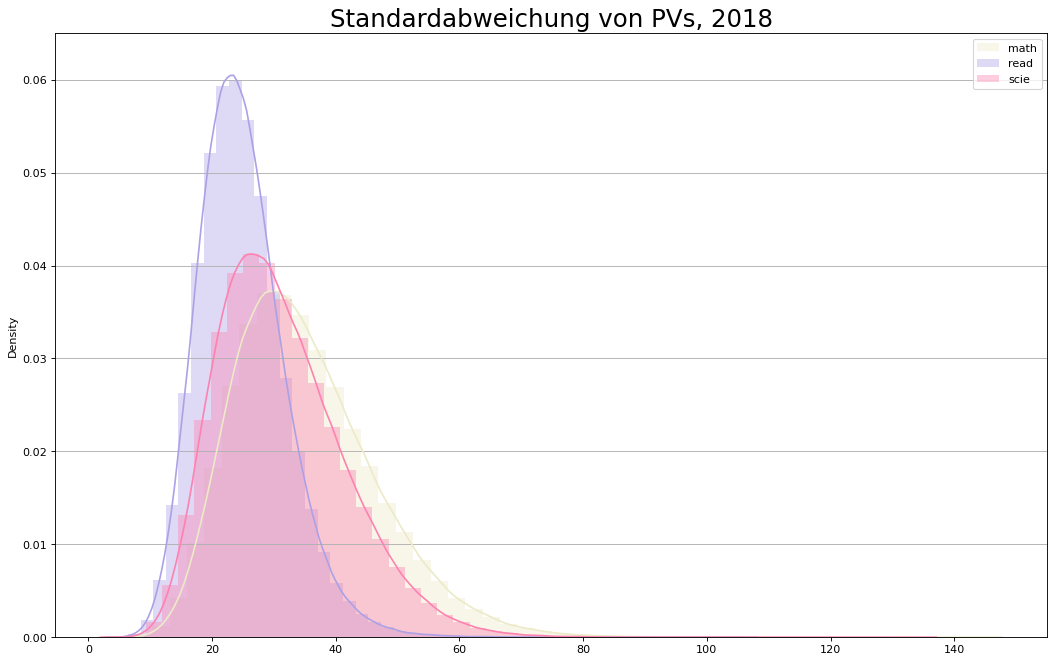

In [86]:
plt.figure(figsize=(16,10), dpi= 80)               
sns.distplot(std_math, color="#eceac7", label='math')
sns.distplot(std_read, color="#ada1e6", label='read')
sns.distplot(std_scie, color="#fd82b1", label='scie')

plt.ylim(0,0.065)
plt.grid(axis='y')

plt.title('Standardabweichung von PVs, 2018', fontsize=22)
plt.legend()
plt.show()

Die Werte gruppieren sich links, also bei kleineren Schwankungen. 
Ich schaue genauer mit Hilfe von relativen Streuungsmaß/Variationskoeffizient nach. Formel:  `Standardabweichung/Mittelwert`

In [134]:
cov_math = std_math / df_it_2018.loc[:, 'PV1MATH':'PV10MATH'].mean(axis=1)
cov_read = std_read / df_it_2018.loc[:, 'PV1READ':'PV10READ'].mean(axis=1)
cov_scie = std_scie / df_it_2018.loc[:, 'PV1SCIE':'PV10SCIE'].mean(axis=1)

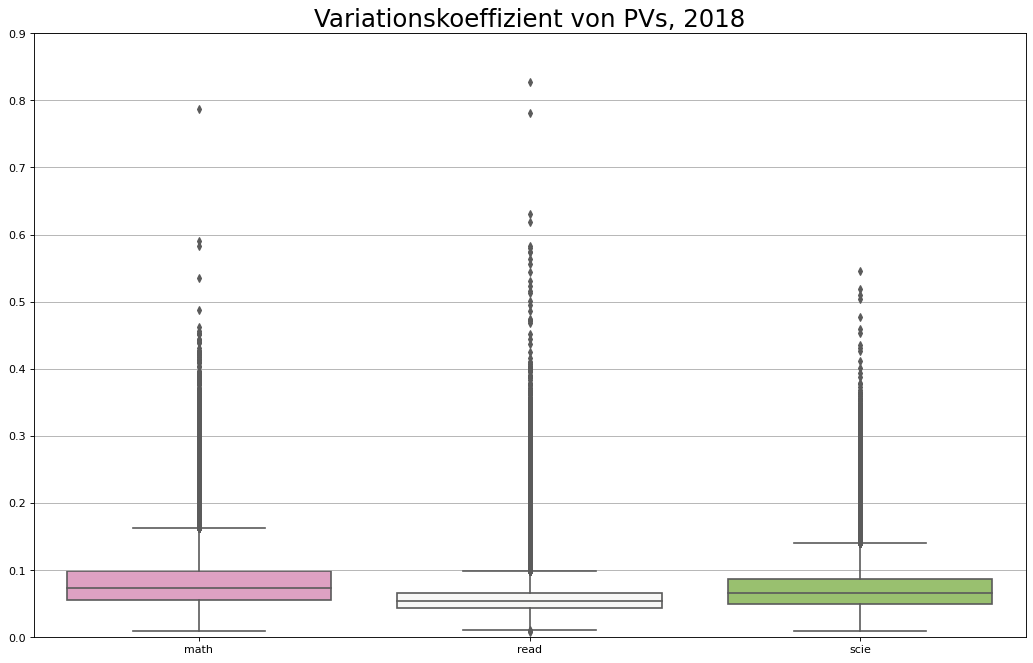

In [135]:
"""Visualisiere relativen Streuungsmaß """
box_plot = pd.DataFrame(cov_math, columns = ['math'])
box_plot['read'] = cov_read
box_plot['scie'] = cov_scie

plt.figure(figsize=(16,10), dpi= 80)               
sns.boxplot( data=box_plot, notch=False, palette='PiYG')
plt.ylim(0,0.9)
plt.grid(axis='y')

plt.title('Variationskoeffizient von PVs, 2018', fontsize=22)
plt.show()


Abweichungen vom Mittelwert betragen meist weniger als 10%. Ich verwende also die "naive" statistische Methode und benutze einen Durchschnitt der PVs pro Schüler.

In [89]:
df_it_2018['math']=df_it_2018.loc[:, 'PV1MATH':'PV10MATH'].mean(axis=1)
df_it_2018['read'] = df_it_2018.loc[:, 'PV1READ':'PV10READ'].mean(axis=1)
df_it_2018['scie'] = df_it_2018.loc[:, 'PV1SCIE':'PV10SCIE'].mean(axis=1)

## 1.2 Analyse

Ich selektiere die Spalten die ich brauche für meine Analyse und speichere sie in neuem DataFrame. 

**IC002Q01HA** "How old were you when you first used a digital device?"

**IC004Q01HA** "How old were you when you first accessed the Internet?"

Die Antworten (aus dem Codebook):

+ `1`___  3 years old or younger  
+ `2`___	 4-6 years old 
+ `3`___	 7-9 years old  
+ `4`___	 10-12 years old 
+ `5`___ 	13 years old or older 
+ `6`___ 	"I have never used a digital device until today / accessed the Internet." 

**CNT** "Country"

**CNTSTUID** "Intl. Student ID"

**ST004D01T** "Student (Standardized) Gender"

Die Antworten (aus dem Codebook):

+ `1`___ Female
+ `2`___ Male

In [90]:
list_dig_2018 = ['CNT', 'CNTSTUID', 'ST004D01T', 'IC002Q01HA', 'IC004Q01HA', 'math', 'read', 'scie']

In [91]:
df_dig_2018 = df_it_2018[list_dig_2018]

"""Ich lösche die Zeilen mit fehlenden Werten"""

drop_18 = df_dig_2018.copy()
drop_18.dropna(inplace=True)
drop_18

,CNT,CNTSTUID,ST004D01T,IC002Q01HA,IC004Q01HA,math,read,scie
0,ALB,800001.0,1.0,5.0,5.0,460.4839,360.9820,378.8231
2,ALB,800003.0,2.0,2.0,2.0,350.4633,277.4818,333.2035
4,ALB,800005.0,1.0,4.0,5.0,389.0078,469.8993,450.5653
5,ALB,800006.0,1.0,3.0,3.0,365.1497,369.9137,371.3960
6,ALB,800007.0,2.0,4.0,3.0,427.3652,334.7742,374.7369
...,...,...,...,...,...,...,...,...
611997,QRT,98329087.0,1.0,2.0,2.0,529.8245,573.4921,576.6313
611999,QRT,98329092.0,1.0,4.0,5.0,511.7838,481.5941,453.8127
612000,QRT,98329094.0,2.0,3.0,4.0,647.5916,668.0791,648.0783
612001,QRT,98329104.0,1.0,3.0,3.0,460.8666,427.7139,414.9387


Ich will sehen, ob genügend Länder (mehr als die Hälfte) die Fragen zum ersten Zugang zu digitalen Geräten und Internet beantwortet  haben. 

In [92]:
länder_it_2018 = df_it_2018.groupby('CNT')['CNTSTUID'].nunique()
länder_dig_2018 = drop_18.groupby('CNT')['CNTSTUID'].nunique()
print('Anzahl Länder allgemein: ' + str(len(länder_it_2018)) + ', Anzahl Länder, die die Frage beantwortet haben: ' + str(len(länder_dig_2018)))

Anzahl Länder allgemein: 80, Anzahl Länder, die die Frage beantwortet haben: 52


### 1.2.1  Alter beim ersten Zugang ins Internet und ersten Nutzen von digitalen Geräten nach Altersgruppen im Jahre 2018

In [93]:
"""Ich fasse alle Länder zusammen"""
group_dig_2018 = drop_18.groupby('IC002Q01HA').size()  
group_dig_18 = pd.DataFrame(group_dig_2018)
group_dig_18

,0
IC002Q01HA,
1.0,26142
2.0,96996
3.0,123995
4.0,73390
5.0,23755


In [94]:
group_dig_18.reset_index(level=0, inplace=True)
group_dig_18.columns=['Alter', 'Count']
group_dig_18

,Alter,Count
0,1.0,26142
1,2.0,96996
2,3.0,123995
3,4.0,73390
4,5.0,23755


In [95]:
group_int_2018 = drop_18.groupby('IC004Q01HA').size()  
group_int_18 = pd.DataFrame(group_int_2018)
group_int_18.reset_index(level=0, inplace=True)
group_int_18.columns=['Alter', 'Count' ]
group_int_18

,Alter,Count
0,1.0,9879
1,2.0,62804
2,3.0,133697
3,4.0,104264
4,5.0,32376
5,6.0,1258


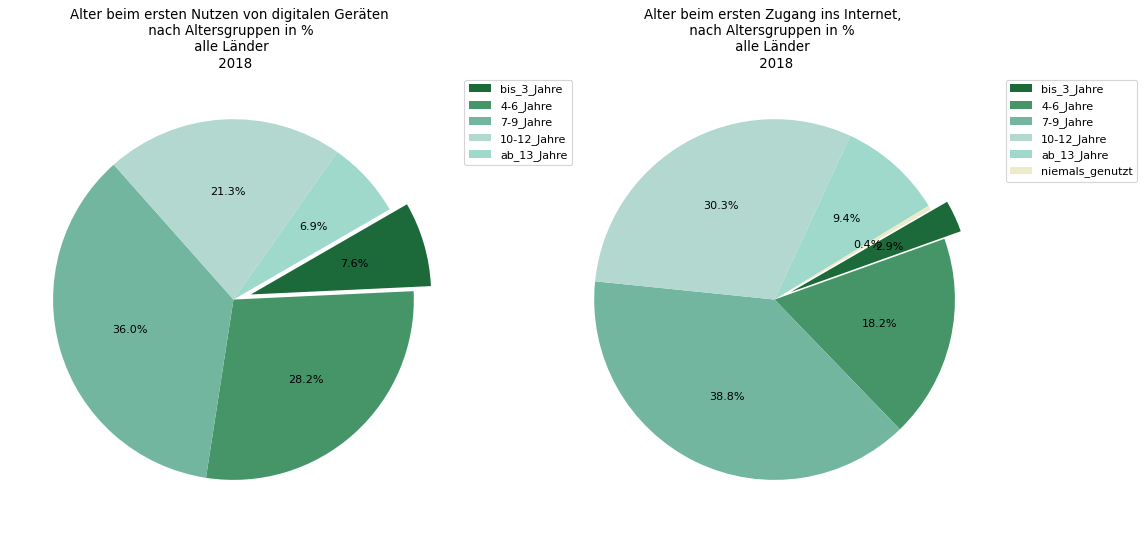

In [96]:

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,8), dpi= 80)

vals = group_dig_18['Count']
vals_i = group_int_18['Count']
colors = ['#1c693a','#469569','#72b6a0', '#b2d8cf', '#9ed9cc', '#eceac7']

labels = ['bis_3_Jahre', '4-6_Jahre','7-9_Jahre', '10-12_Jahre', 'ab_13_Jahre', 'niemals_genutzt']
explode = (0.1,0,0,0,0)
explode_i = (0.1,0,0,0,0,0)
ax1.pie(vals, colors = colors, autopct='%1.1f%%', explode=explode, rotatelabels=True, startangle=30, counterclock=False)
ax2.pie(vals_i, colors = colors, autopct='%1.1f%%', explode=explode_i, rotatelabels=True, startangle=30, counterclock=False)

ax1.legend( labels, loc="upper left", bbox_to_anchor=(1, 0, 0.3, 1))  
ax2.legend( labels, loc="upper left", bbox_to_anchor=(1, 0, 0.3, 1)) 
ax1.set_title('Alter beim ersten Nutzen von digitalen Geräten  \n nach Altersgruppen in %  \n alle Länder  \n 2018')
ax2.set_title('Alter beim ersten Zugang ins Internet, \n nach Altersgruppen in %  \n alle Länder  \n 2018')
plt.show()

### 1.2.2  Alter beim ersten Nutzen von digitalen Geräten und schulische Leistung im Jahre 2018.

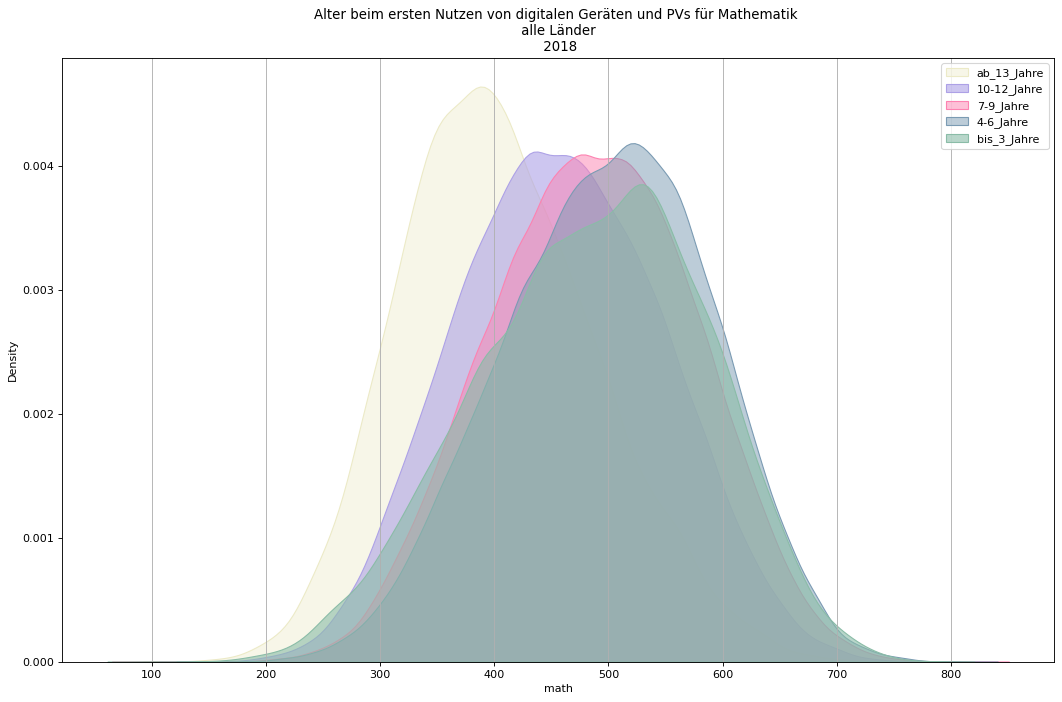

In [97]:
"""Ich schaue erst am Beispiel von PVs für Mathematik"""

plt.figure(figsize=(16,10), dpi= 80)               
sns.kdeplot(drop_18.loc[drop_18['IC002Q01HA'] == 6, "math"], shade=True, color="#513e5c", label='niemals_genutzt', alpha=.4)
sns.kdeplot(drop_18.loc[drop_18['IC002Q01HA'] == 5, "math"], shade=True, color="#eceac7", label='ab_13_Jahre', alpha=.4)
sns.kdeplot(drop_18.loc[drop_18['IC002Q01HA'] == 4, "math"], shade=True, color="#ada1e6", label='10-12_Jahre', alpha=.6)
sns.kdeplot(drop_18.loc[drop_18['IC002Q01HA'] == 3, "math"], shade=True, color="#fd82b1", label='7-9_Jahre', alpha=.5)
sns.kdeplot(drop_18.loc[drop_18['IC002Q01HA'] == 2, "math"], shade=True, color="#7b9bb3", label='4-6_Jahre', alpha=.5)
sns.kdeplot(drop_18.loc[drop_18['IC002Q01HA'] == 1, "math"], shade=True, color="#8abca7", label='bis_3_Jahre', alpha=.6)
plt.grid(axis='x')

plt.title('Alter beim ersten Nutzen von digitalen Geräten und PVs für Mathematik \n alle Länder \n 2018')
plt.legend()
plt.show()

In [98]:
"""Ich nehme mittlere Wert von allen PVs für nächsten Überblick"""
drop_18['mean'] = drop_18[['math', 'read', 'scie']].mean(axis=1) 
drop_18.head(3)

,CNT,CNTSTUID,ST004D01T,IC002Q01HA,IC004Q01HA,math,read,scie,mean
0,ALB,800001.0,1.0,5.0,5.0,460.4839,360.9820,378.8231,400.096333
2,ALB,800003.0,2.0,2.0,2.0,350.4633,277.4818,333.2035,320.382867
4,ALB,800005.0,1.0,4.0,5.0,389.0078,469.8993,450.5653,436.490800


In [99]:
age_map = {1: 'bis_3_Jahre', 2: '4-6_Jahre', 3: '7-9_Jahre', 4: '10-12_Jahre', 5: 'ab_13_Jahre', 6:  'niemals_genutzt'}
drop_18['dig_age'] = drop_18['IC002Q01HA'].map(age_map)
drop_18['int_age'] = drop_18['IC004Q01HA'].map(age_map)

gender_map = {1: 'weiblich', 2: 'männlich'}
drop_18['gender'] = drop_18['ST004D01T'].map(gender_map)

"""Ich sortiere Daten  für die richtige Reihenfolge beim Plotten"""

drop_sort_dig = drop_18.sort_values(by='IC002Q01HA')
drop_sort_int = drop_18.sort_values(by='IC004Q01HA')

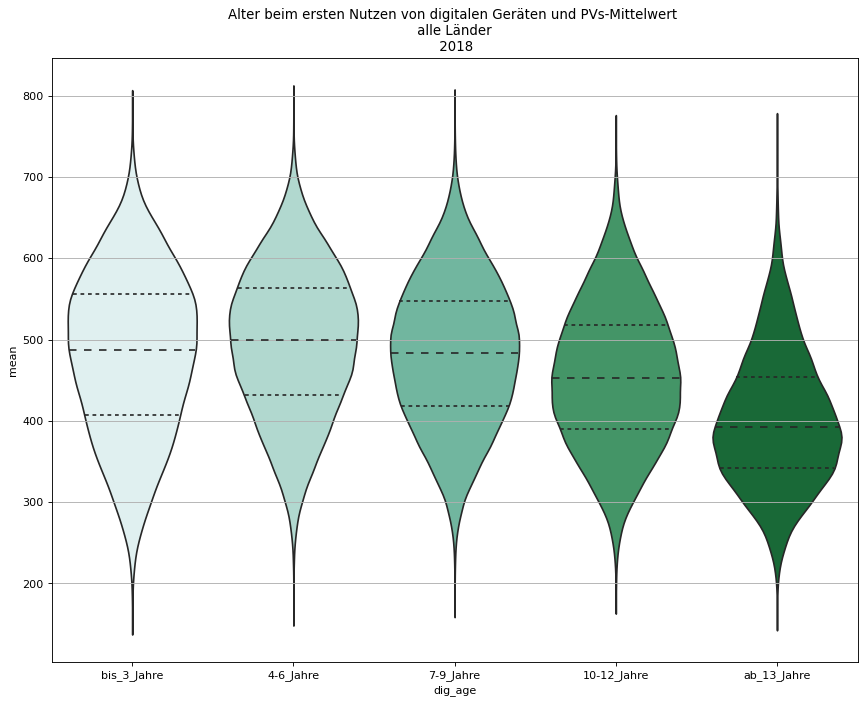

In [100]:
plt.figure(figsize=(13,10), dpi= 80)

sns.violinplot(data=drop_sort_dig, x='dig_age', y='mean',  scale='width', inner='quartile', palette='BuGn')
plt.grid(axis='y')

plt.title('Alter beim ersten Nutzen von digitalen Geräten und PVs-Mittelwert \n alle Länder \n 2018')
plt.show()

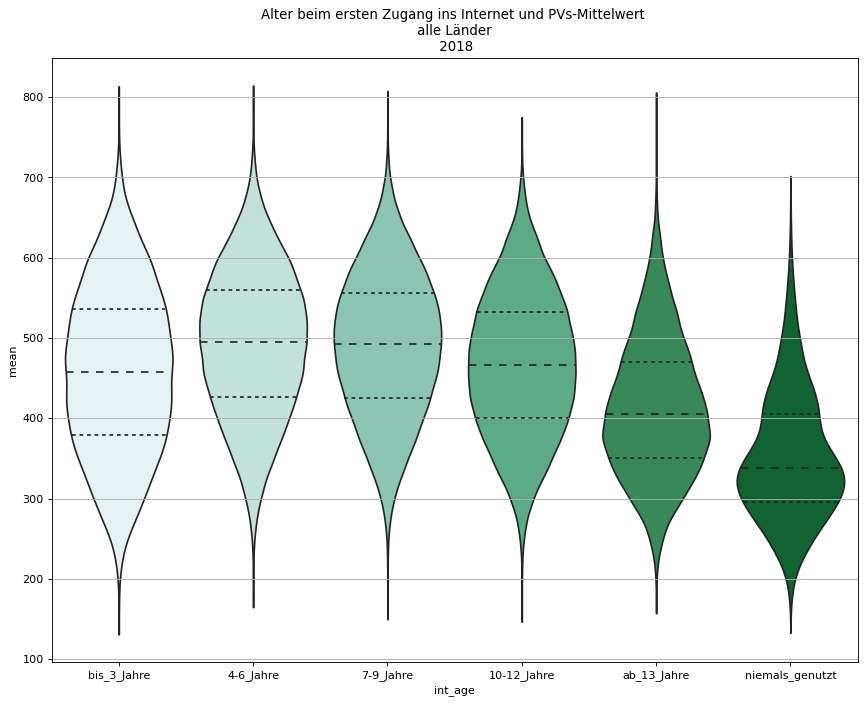

In [101]:
plt.figure(figsize=(13,10), dpi= 80)

sns.violinplot(data=drop_sort_int, x='int_age', y='mean',  scale='width', inner='quartile', palette='BuGn')
plt.grid(axis='y')

plt.title('Alter beim ersten Zugang ins Internet und PVs-Mittelwert \n alle Länder \n 2018')
plt.show()

### 1.2.3  Vergleich von Ländern mit unterschiedlichem Armut-Niveau

In [102]:
df_länder_2018 = drop_18.loc[drop_18['CNT'].isin(['BGR', 'DOM', 'FIN'])]
df_länder_18 = df_länder_2018.sort_values(by='IC002Q01HA')# in dieser Spalte sind die Werte numerisch

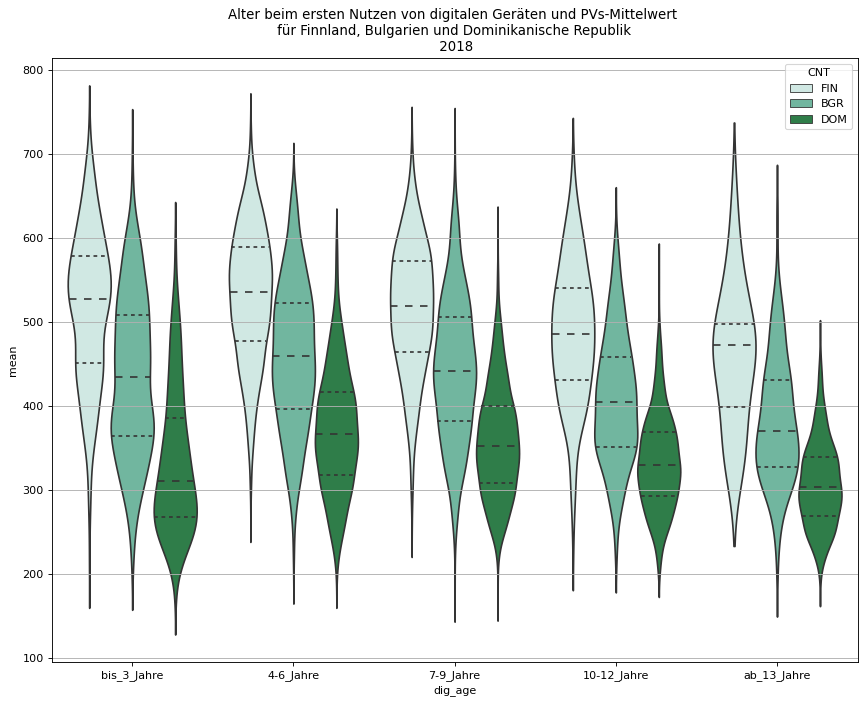

In [103]:
plt.figure(figsize=(13,10), dpi= 80)

sns.violinplot(data=df_länder_18, x='dig_age', y='mean', hue = 'CNT', scale='width', inner='quartile', palette='BuGn')
plt.grid(axis='y')

plt.title('Alter beim ersten Nutzen von digitalen Geräten und PVs-Mittelwert \n für Finnland, Bulgarien und Dominikanische Republik \n 2018')
plt.show()

Auch hier ist die Tendenz zu sehen: späterer Zugang zu den digitalen Medien wirkt sich nicht positiv auf die schulische Leistung aus. 

# 2.  Jahr 2015

## 2.1 Exploration 

In [104]:
"""Lade die CSV_Datei, die ich in Dokument 1 erstellt habe"""

df_it_2015 = pd.read_csv('pisa_it_15.csv')
df_it_2015

,Unnamed: 0,CNT,CNTSTUID,ST004D01T,ST005Q01TA,ST006Q01TA,ST006Q02TA,ST006Q03TA,ST006Q04TA,ST007Q01TA,...,PV5SCIE,PV6SCIE,PV7SCIE,PV8SCIE,PV9SCIE,PV10SCIE,hisei,IC002Q01NA,IC003Q01TA,IC004Q01TA
0,0,ALB,803627.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,519.208,463.128,543.640,459.159,461.522,499.540,NaN,NaN,NaN,NaN
1,1,ALB,800454.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,437.558,478.770,494.996,499.377,510.158,471.167,NaN,NaN,NaN,NaN
2,2,ALB,800893.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,415.724,435.887,425.362,474.415,407.678,462.279,NaN,NaN,NaN,NaN
3,3,ALB,804180.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,434.318,431.472,392.688,416.805,421.642,404.352,NaN,NaN,NaN,NaN
4,4,ALB,800491.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,427.242,386.204,459.435,381.835,367.871,440.709,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519329,519329,QAR,97404172.0,2.0,1.0,2.0,1.0,2.0,NaN,1.0,...,481.695,474.336,471.168,473.762,452.362,487.817,81.0,NaN,NaN,NaN
519330,519330,QAR,97406046.0,2.0,1.0,2.0,2.0,2.0,NaN,1.0,...,514.266,516.805,538.503,561.281,554.203,584.669,62.0,NaN,NaN,NaN
519331,519331,QAR,97404326.0,2.0,3.0,2.0,2.0,2.0,NaN,1.0,...,516.125,589.567,550.492,504.211,531.854,581.060,NaN,NaN,NaN,NaN
519332,519332,QAR,97401708.0,2.0,1.0,2.0,1.0,2.0,NaN,1.0,...,530.396,526.964,467.657,482.873,499.062,526.140,79.0,NaN,NaN,NaN


Wiederhole den Vorgang wie mit dem Jahr 2018:

In [105]:
df_it_2015['math']=df_it_2015.loc[:, 'PV1MATH':'PV10MATH'].mean(axis=1)
df_it_2015['read'] = df_it_2015.loc[:, 'PV1READ':'PV10READ'].mean(axis=1)
df_it_2015['scie'] = df_it_2015.loc[:, 'PV1SCIE':'PV10SCIE'].mean(axis=1)

In [106]:
df_it_2015

,Unnamed: 0,CNT,CNTSTUID,ST004D01T,ST005Q01TA,ST006Q01TA,ST006Q02TA,ST006Q03TA,ST006Q04TA,ST007Q01TA,...,PV8SCIE,PV9SCIE,PV10SCIE,hisei,IC002Q01NA,IC003Q01TA,IC004Q01TA,math,read,scie
0,0,ALB,803627.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,459.159,461.522,499.540,NaN,NaN,NaN,NaN,453.2652,464.7217,495.2442
1,1,ALB,800454.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,499.377,510.158,471.167,NaN,NaN,NaN,NaN,420.3666,421.9881,483.8646
2,2,ALB,800893.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,474.415,407.678,462.279,NaN,NaN,NaN,NaN,352.3811,531.4783,429.1337
3,3,ALB,804180.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,416.805,421.642,404.352,NaN,NaN,NaN,NaN,399.9742,530.6209,416.9326
4,4,ALB,800491.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,381.835,367.871,440.709,NaN,NaN,NaN,NaN,317.4811,401.8058,415.8643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519329,519329,QAR,97404172.0,2.0,1.0,2.0,1.0,2.0,NaN,1.0,...,473.762,452.362,487.817,81.0,NaN,NaN,NaN,421.3791,440.4877,469.2266
519330,519330,QAR,97406046.0,2.0,1.0,2.0,2.0,2.0,NaN,1.0,...,561.281,554.203,584.669,62.0,NaN,NaN,NaN,522.5468,556.1870,546.7183
519331,519331,QAR,97404326.0,2.0,3.0,2.0,2.0,2.0,NaN,1.0,...,504.211,531.854,581.060,NaN,NaN,NaN,NaN,520.7731,526.7217,546.5396
519332,519332,QAR,97401708.0,2.0,1.0,2.0,1.0,2.0,NaN,1.0,...,482.873,499.062,526.140,79.0,NaN,NaN,NaN,500.2833,500.3660,504.7255


## 2.2 Analyse
### 2.2.1 Datenanpassung

Im Jahre 2015 gibt es 2 Spalten für Angaben bezüglich Alter beim ersten Zugang zu digitalen Geräten, die Spaltennamen unterscheiden sich auch:

**IC002Q01NA** "How old were you when you first used a digital device?"

**IC003Q01TA** "How old were you when you first used a computer"

In der Analyse berücksichtige ich also die jüngsten Altersangaben aus beiden Spalten, denn Nutzen vom Computer und dem Nutzen von digitalen Geräten zählt. 

**IC004Q01TA** 'How old were you when you first accessed the Internet?'


Die Antworten sind auch anders: Angaben sind erst ab 6 Jahre (aus dem Codebook):

+ `1`___  6 years old or younger  
+ `2`___  7-9 years old  
+ `3`___  10-12 years old  
+ `4`___  13 years old or older
+ `5`___  "I have never used a digital device until today / accessed the Internet."


**CNT** "Country"

**CNTSTUID** "Intl. Student ID"

**ST004D01T** "Student (Standardized) Gender"

Die Antworten (aus dem Codebook):

+ `1`___ Female
+ `2`___ Male

In [107]:
list_dig_2015 = ['CNT', 'CNTSTUID', 'ST004D01T', 'IC002Q01NA', 'IC003Q01TA', 'IC004Q01TA', 'math', 'read', 'scie']

In [108]:
df_dig_2015 = df_it_2015[list_dig_2015]
"""Ich lösche die Zeilen mit fehlenden Werte"""
drop_15 = df_dig_2015.copy()
drop_15.dropna(inplace=True)
drop_15

,CNT,CNTSTUID,ST004D01T,IC002Q01NA,IC003Q01TA,IC004Q01TA,math,read,scie
10734,AUS,3610676.0,1.0,1.0,1.0,1.0,545.8999,586.5175,589.5787
10735,AUS,3611874.0,1.0,1.0,1.0,2.0,511.6101,570.8238,557.2042
10736,AUS,3601769.0,1.0,3.0,2.0,3.0,478.6052,570.0345,569.4709
10737,AUS,3605996.0,1.0,2.0,1.0,2.0,506.0904,531.0690,529.0353
10738,AUS,3608147.0,2.0,3.0,3.0,3.0,481.8569,506.4988,504.2148
...,...,...,...,...,...,...,...,...,...
514131,QES,97110378.0,2.0,1.0,2.0,2.0,444.4228,356.9142,356.3752
514132,QES,97102827.0,2.0,1.0,2.0,3.0,414.8608,435.5499,417.4766
514133,QES,97111133.0,2.0,1.0,1.0,2.0,408.0436,436.9452,382.7109
514134,QES,97115014.0,2.0,1.0,1.0,1.0,380.6508,350.4346,344.6737


Ich möchte prüfen, ob die Länder aus 2015 und 2018, die sich aussortiert haben, kompartibel sind

In [109]:
countries_18 = drop_18['CNT'].unique()
countries_15 = drop_15['CNT'].unique()

In [110]:
missing_list = []
for i in countries_18:
    if i not in countries_15:
        missing_list.append(i)
missing_list

['ALB',
 'BRN',
 'GEO',
 'KAZ',
 'MLT',
 'MAR',
 'PAN',
 'SRB',
 'TUR',
 'USA',
 'QMR',
 'QRT']

Ich nehme nur die Länder, die in beiden Jahren erscheinen

In [111]:
vergleich_list = [i for i in countries_18 if i in countries_15]
#vergleich_list 

In [112]:
vergleich_15 = drop_15.loc[drop_15['CNT'].isin(vergleich_list)]
vergleich_15

,CNT,CNTSTUID,ST004D01T,IC002Q01NA,IC003Q01TA,IC004Q01TA,math,read,scie
10734,AUS,3610676.0,1.0,1.0,1.0,1.0,545.8999,586.5175,589.5787
10735,AUS,3611874.0,1.0,1.0,1.0,2.0,511.6101,570.8238,557.2042
10736,AUS,3601769.0,1.0,3.0,2.0,3.0,478.6052,570.0345,569.4709
10737,AUS,3605996.0,1.0,2.0,1.0,2.0,506.0904,531.0690,529.0353
10738,AUS,3608147.0,2.0,3.0,3.0,3.0,481.8569,506.4988,504.2148
...,...,...,...,...,...,...,...,...,...
471962,URY,85801170.0,2.0,1.0,1.0,2.0,385.0849,387.6478,420.7727
471963,URY,85801259.0,2.0,1.0,1.0,1.0,382.4407,405.5912,415.3510
471964,URY,85802623.0,2.0,2.0,2.0,2.0,310.4738,343.4495,342.0483
471965,URY,85800927.0,2.0,1.0,1.0,2.0,316.2570,267.5430,309.0028


In [113]:
vergleich_18 = drop_18.loc[drop_18['CNT'].isin(vergleich_list)]
vergleich_18

,CNT,CNTSTUID,ST004D01T,IC002Q01HA,IC004Q01HA,math,read,scie,mean,dig_age,int_age,gender
25161,AUS,3600002.0,2.0,3.0,2.0,602.2246,569.8734,601.0977,591.065233,7-9_Jahre,4-6_Jahre,männlich
25162,AUS,3600003.0,1.0,3.0,6.0,396.2231,313.2239,319.7321,343.059700,7-9_Jahre,niemals_genutzt,weiblich
25163,AUS,3600005.0,1.0,2.0,3.0,329.3262,418.5441,329.1623,359.010867,4-6_Jahre,7-9_Jahre,weiblich
25164,AUS,3600006.0,2.0,2.0,4.0,572.3472,559.9367,564.4999,565.594600,4-6_Jahre,10-12_Jahre,männlich
25165,AUS,3600007.0,2.0,1.0,1.0,381.5819,375.6268,447.2706,401.493100,bis_3_Jahre,bis_3_Jahre,männlich
...,...,...,...,...,...,...,...,...,...,...,...,...
592107,URY,85806543.0,1.0,5.0,5.0,310.1757,426.7901,385.4891,374.151633,ab_13_Jahre,ab_13_Jahre,weiblich
592110,URY,85806546.0,1.0,2.0,3.0,372.3221,302.1694,329.9532,334.814900,4-6_Jahre,7-9_Jahre,weiblich
592111,URY,85806548.0,2.0,2.0,2.0,310.2073,301.4824,302.9209,304.870200,4-6_Jahre,4-6_Jahre,männlich
592112,URY,85806549.0,1.0,3.0,4.0,498.1638,563.9128,523.3293,528.468633,7-9_Jahre,10-12_Jahre,weiblich


In [114]:
"""Ich nehme das jüngste Alter aus zwei Spalten IC002Q01NA "How old were you when you first used a digital device?"
und IC003Q01TA "How old were you when you first used a computer"""

vergleich_15['min_age'] = vergleich_15[['IC002Q01NA', 'IC003Q01TA']].min(axis=1)
vergleich_15.head(3)


/opt/miniconda3/envs/base3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,CNT,CNTSTUID,ST004D01T,IC002Q01NA,IC003Q01TA,IC004Q01TA,math,read,scie,min_age
10734,AUS,3610676.0,1.0,1.0,1.0,1.0,545.8999,586.5175,589.5787,1.0
10735,AUS,3611874.0,1.0,1.0,1.0,2.0,511.6101,570.8238,557.2042,1.0
10736,AUS,3601769.0,1.0,3.0,2.0,3.0,478.6052,570.0345,569.4709,2.0


In [115]:
"""Konvertieren von kategorischen Variablen """

age_map_15 = {1: 'bis_6_Jahre', 2: '7-9_Jahre', 3: '10-12_Jahre', 4: 'ab_13_Jahre', 5:  'niemals_genutzt'}
vergleich_15['dig_age'] = vergleich_15['min_age'].map(age_map_15)
vergleich_15['int_age'] = vergleich_15['IC004Q01TA'].map(age_map_15)


vergleich_15['gender'] = vergleich_15['ST004D01T'].map(gender_map)



/opt/miniconda3/envs/base3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/miniconda3/envs/base3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/miniconda3/envs/base3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

In [116]:
vergleich_15

,CNT,CNTSTUID,ST004D01T,IC002Q01NA,IC003Q01TA,IC004Q01TA,math,read,scie,min_age,dig_age,int_age,gender
10734,AUS,3610676.0,1.0,1.0,1.0,1.0,545.8999,586.5175,589.5787,1.0,bis_6_Jahre,bis_6_Jahre,weiblich
10735,AUS,3611874.0,1.0,1.0,1.0,2.0,511.6101,570.8238,557.2042,1.0,bis_6_Jahre,7-9_Jahre,weiblich
10736,AUS,3601769.0,1.0,3.0,2.0,3.0,478.6052,570.0345,569.4709,2.0,7-9_Jahre,10-12_Jahre,weiblich
10737,AUS,3605996.0,1.0,2.0,1.0,2.0,506.0904,531.0690,529.0353,1.0,bis_6_Jahre,7-9_Jahre,weiblich
10738,AUS,3608147.0,2.0,3.0,3.0,3.0,481.8569,506.4988,504.2148,3.0,10-12_Jahre,10-12_Jahre,männlich
...,...,...,...,...,...,...,...,...,...,...,...,...,...
471962,URY,85801170.0,2.0,1.0,1.0,2.0,385.0849,387.6478,420.7727,1.0,bis_6_Jahre,7-9_Jahre,männlich
471963,URY,85801259.0,2.0,1.0,1.0,1.0,382.4407,405.5912,415.3510,1.0,bis_6_Jahre,bis_6_Jahre,männlich
471964,URY,85802623.0,2.0,2.0,2.0,2.0,310.4738,343.4495,342.0483,2.0,7-9_Jahre,7-9_Jahre,männlich
471965,URY,85800927.0,2.0,1.0,1.0,2.0,316.2570,267.5430,309.0028,1.0,bis_6_Jahre,7-9_Jahre,männlich


In [117]:
"""Berechne den mittleren Wert von allen PVs """
vergleich_15['mean'] = vergleich_15[['math', 'read', 'scie']].mean(axis=1) 
vergleich_15.head(3)

/opt/miniconda3/envs/base3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,CNT,CNTSTUID,ST004D01T,IC002Q01NA,IC003Q01TA,IC004Q01TA,math,read,scie,min_age,dig_age,int_age,gender,mean
10734,AUS,3610676.0,1.0,1.0,1.0,1.0,545.8999,586.5175,589.5787,1.0,bis_6_Jahre,bis_6_Jahre,weiblich,573.998700
10735,AUS,3611874.0,1.0,1.0,1.0,2.0,511.6101,570.8238,557.2042,1.0,bis_6_Jahre,7-9_Jahre,weiblich,546.546033
10736,AUS,3601769.0,1.0,3.0,2.0,3.0,478.6052,570.0345,569.4709,2.0,7-9_Jahre,10-12_Jahre,weiblich,539.370200


### 2.2.2 Alter beim ersten Nutzen von digitalen Geräten nach Altersgruppen 2015 und 2018

In [118]:
"""Ich fasse alle Länder im 2015 zusammen"""
group_dig_2015 = vergleich_15.groupby('IC002Q01NA').size()  
group_dig_15 = pd.DataFrame(group_dig_2015)
group_dig_15.reset_index(level=0, inplace=True)
group_dig_15.columns=['Alter', 'Count' ]
group_dig_15

,Alter,Count
0,1.0,79132
1,2.0,95171
2,3.0,55330
3,4.0,16862


#### Datenanpassung

Für meinen Vergleich soll ich die Altersgruppen im Jahr 2018 korrigieren,
denn im Jahr 2015:

+ `1`___  6 years old or younger  
+ `2`___  7-9 years old  
+ `3`___  10-12 years old  
+ `4`___  13 years old or older
+ `5`___  "I have never used a digital device until today / accessed the Internet." 

Und im Jahr 2018:

+ `1`___  3 years old or younger  
+ `2`___	 4-6 years old 
+ `3`___	 7-9 years old  
+ `4`___	 10-12 years old 
+ `5`___ 	13 years old or older 
+ `6`___ 	"I have never used a digital device until today / accessed the Internet." 



In [119]:
"""Ich fasse die Altersgruppen 1 und 2 zusammen und korrigiere entsprechend die restlichen Gruppen"""
age_18_korr = {1:1, 2:1, 3:2, 4:3, 5:4, 6:5}
vergleich_18['dig_age_korr'] = vergleich_18['IC002Q01HA'].map(age_18_korr)
vergleich_18.tail(4)

/opt/miniconda3/envs/base3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,CNT,CNTSTUID,ST004D01T,IC002Q01HA,IC004Q01HA,math,read,scie,mean,dig_age,int_age,gender,dig_age_korr
592110,URY,85806546.0,1.0,2.0,3.0,372.3221,302.1694,329.9532,334.814900,4-6_Jahre,7-9_Jahre,weiblich,1
592111,URY,85806548.0,2.0,2.0,2.0,310.2073,301.4824,302.9209,304.870200,4-6_Jahre,4-6_Jahre,männlich,1
592112,URY,85806549.0,1.0,3.0,4.0,498.1638,563.9128,523.3293,528.468633,7-9_Jahre,10-12_Jahre,weiblich,2
592113,URY,85806550.0,1.0,4.0,3.0,555.8105,602.5244,576.5752,578.303367,10-12_Jahre,7-9_Jahre,weiblich,3


In [120]:
"""Ich fasse alle Länder 2018 mit korregierten Altersgruppen zusammen"""

group_dig_2018_korr = vergleich_18.groupby('dig_age_korr').size()  # bekomme typ "Series" und
group_dig_18_korr = pd.DataFrame(group_dig_2018_korr) # konvertiere zu DataFrame
group_dig_18_korr.reset_index(level=0, inplace=True)
group_dig_18_korr.columns=['Alter', 'Count']
group_dig_18_korr

,Alter,Count
0,1,100420
1,2,99670
2,3,56023
3,4,14126


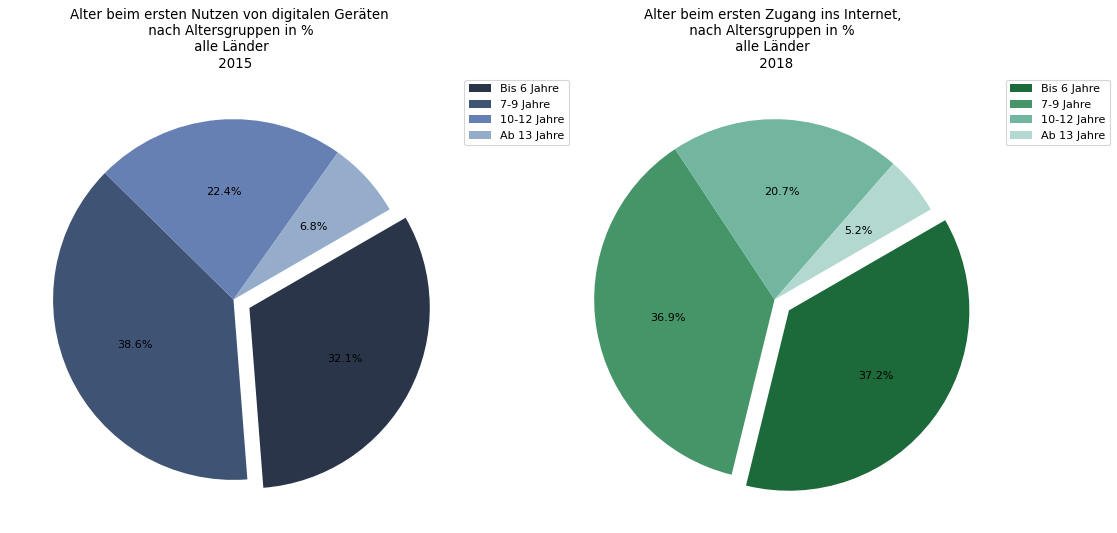

In [121]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,8), dpi= 80)

vals = group_dig_15['Count']
vals_k = group_dig_18_korr['Count']
colors = ['#2a3549','#3f5374','#6780b3', '#95acca', '#ebf1fb']
colors_k = ['#1c693a','#469569','#72b6a0', '#b2d8cf', '#9ed9cc']



labels = ['Bis 6 Jahre','7-9 Jahre', '10-12 Jahre', 'Ab 13 Jahre']
explode = (0.1,0,0,0)
explode_k = (0.1,0,0,0)
ax1.pie(vals, colors = colors, autopct='%1.1f%%', explode=explode, rotatelabels=True, startangle=30, counterclock=False)
ax2.pie(vals_k, colors = colors_k, autopct='%1.1f%%', explode=explode_k, rotatelabels=True, startangle=30, counterclock=False)

ax1.legend( labels, loc="upper left", bbox_to_anchor=(1, 0, 0.3, 1))  
ax2.legend( labels, loc="upper left", bbox_to_anchor=(1, 0, 0.3, 1)) 

ax1.set_title('Alter beim ersten Nutzen von digitalen Geräten  \n nach Altersgruppen in %  \n alle Länder  \n 2015')
ax2.set_title('Alter beim ersten Zugang ins Internet, \n nach Altersgruppen in %  \n alle Länder  \n 2018')
plt.show()

Es ist zu sehen, dass im Jahr 2018 die Gruppe von Kindern, die vor ihrem 6. Lebensjahr Zugang zu den digitalen Geräten hatten gestiegen ist.

### 2.2.3 Vergleich von Ländern mit unterschiedlichem Armut-Niveau

In [122]:
"""Ich nehme andere Länder mit einer unterschiedlichen Wirtschaftsleistung"""

df_länder_2015 = vergleich_15.loc[drop_15['CNT'].isin([ 'LTU', 'URY', 'DNK'])]
df_länder_15 = df_länder_2015.sort_values(by='min_age') # in dieser Spalte sind die Daten numerisch

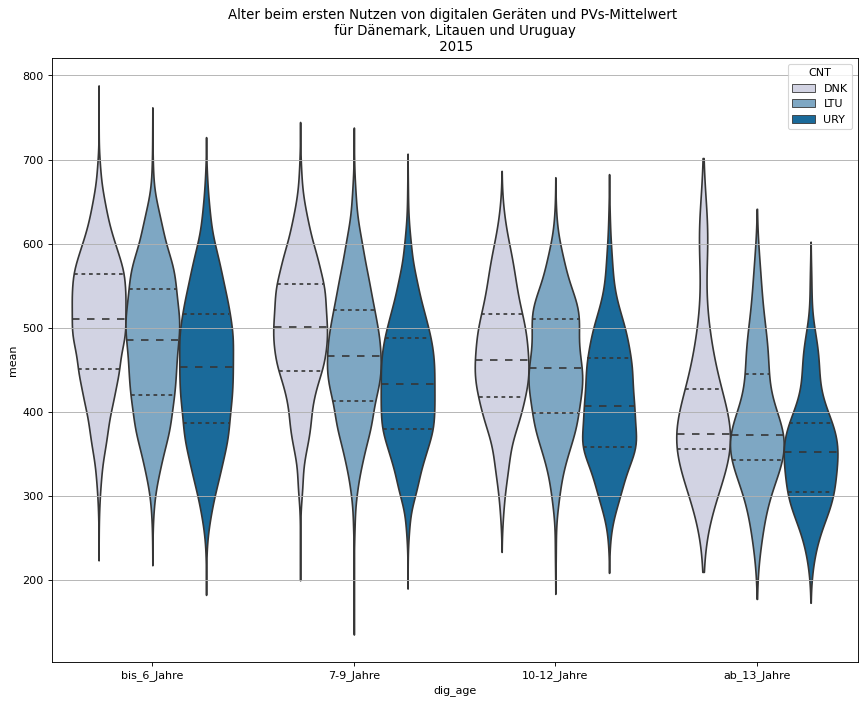

In [123]:
plt.figure(figsize=(13,10), dpi= 80)

sns.violinplot(data=df_länder_15, x='dig_age', y='mean', hue = 'CNT', scale='width', inner='quartile', palette='PuBu')
plt.grid(axis='y')

plt.title('Alter beim ersten Nutzen von digitalen Geräten und PVs-Mittelwert \n für Dänemark, Litauen und Uruguay \n 2015')
plt.show()

Auch im Jahre 2015 ist die Tendenz zu sehen: früher Zugang zu den digitalen Medien beeinflusst nicht negativ die durchschnittlichen schulischen Leistungen. 

#### Überblick der Verteilung nach Alter beim ersten Nutzen von digitalen Geräten im Jahr 2018

In [124]:
"""Ich nehme die Spalte IC002Q01HA mit numerischen Daten für eine ordentliche Gruppierung. 
Spalte ST004D01T ist für 'Student ID' """

df_ver_18 = vergleich_18.pivot_table(index = ['CNT'], columns = ['IC002Q01HA'], values = ['ST004D01T'], aggfunc='count')
df_ver_18.head(3)

ST004D01T                       
IC002Q01HA       1.0   2.0   3.0   4.0  5.0
CNT                                        
AUS              884  3236  4491  2599  571
BEL              389  1695  2843  2234  375
BGR              567  1482  1433   568  206

In [125]:
df_vergl_18 = df_ver_18.droplevel(level = 0, axis=1) # lösche MiltiIndex ST004D01T

"""Ich möchte eine Zeile mit den mittleren Werten aus allen Ländern bilden """
df_vergl_18.loc['OECD'] = df_vergl_18.mean(axis=0)

""" Gebe die entsprechenden Spaltennamen """

df_vergl_18.columns = ['bis_3_Jahre', '4_6_Jahre', '7_9_Jahre', '10_12_Jahre', 'ab_13_Jahre']
df_vergl_18.head(3)

,bis_3_Jahre,4_6_Jahre,7_9_Jahre,10_12_Jahre,ab_13_Jahre
CNT,,,,,
AUS,884.0,3236.0,4491.0,2599.0,571.0
BEL,389.0,1695.0,2843.0,2234.0,375.0
BGR,567.0,1482.0,1433.0,568.0,206.0


In [129]:
"""Sortiere alle Länder um, von größtem Anteil von Kindern, die früherer Zugang zu IKT hatten, abwärts.
Dafür bilde ich Spalte mit prozentualem Anteil """
df_vergl_18


df_vergl_18['Prozent_bis_3_Jahre'] = df_vergl_18['bis_3_Jahre'] / df_vergl_18.loc[:,'bis_3_Jahre':'ab_13_Jahre'].sum(axis=1) * 100
vergl_18 = df_vergl_18.sort_values('Prozent_bis_3_Jahre', kind='mergesort', ascending=False) 

vergl_18.head(3)

,bis_3_Jahre,4_6_Jahre,7_9_Jahre,10_12_Jahre,ab_13_Jahre,Prozent_bis_3_Jahre
CNT,,,,,,
ISR,718.0,1693.0,1556.0,764.0,267.0,14.365746
SWE,713.0,2037.0,1637.0,502.0,75.0,14.363417
BGR,567.0,1482.0,1433.0,568.0,206.0,13.322368


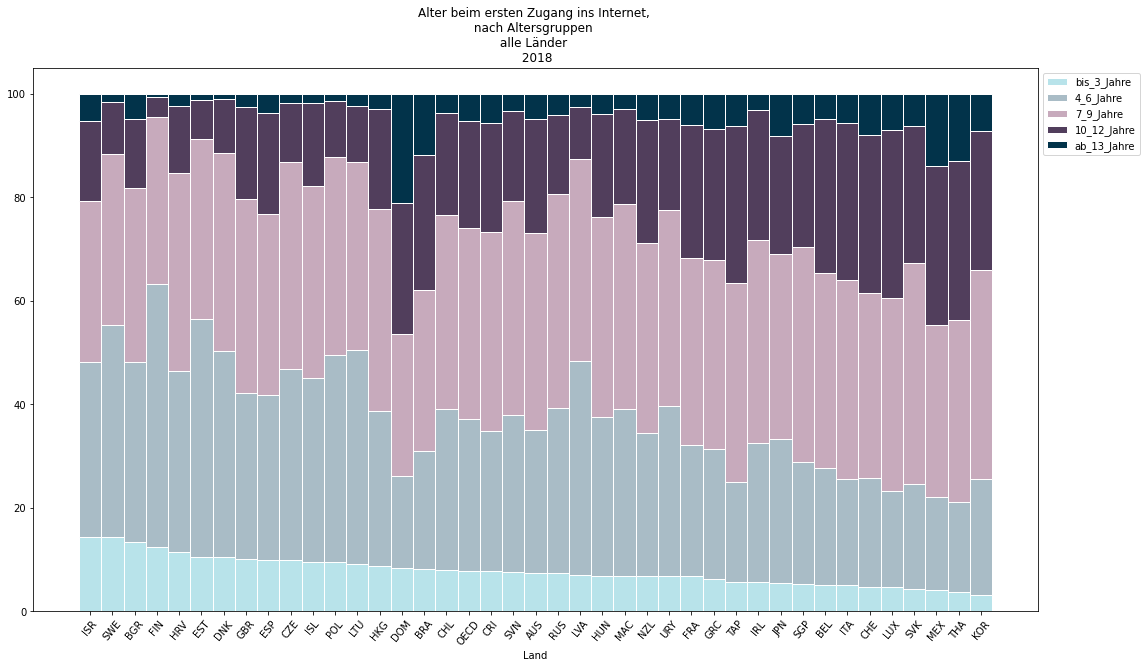

In [132]:
r = vergl_18.index
 
# Altersgruppen prozentual
total = [a+b+c+d+e for a,b,c,d,e in zip(vergl_18['bis_3_Jahre'], vergl_18['4_6_Jahre'], vergl_18['7_9_Jahre'], vergl_18['10_12_Jahre'], vergl_18['ab_13_Jahre'])]
jahre_3 = [i / j * 100 for i,j in zip(vergl_18['bis_3_Jahre'], total)]
jahre_4_6 = [i / j * 100 for i,j in zip(vergl_18['4_6_Jahre'], total)]
jahre_7_9 = [i / j * 100 for i,j in zip(vergl_18['7_9_Jahre'], total)]
jahre_10_12 = [i / j * 100 for i,j in zip(vergl_18['10_12_Jahre'], total)]
jahre_ab_13 = [i / j * 100 for i,j in zip(vergl_18['ab_13_Jahre'], total)]


plt.figure(figsize = (18,10))
barWidth = 1.0
names = vergl_18.index

plt.bar(r, jahre_3, color='#b8e3ea', edgecolor='white', width=barWidth)
plt.bar(r, jahre_4_6, bottom=jahre_3, color='#a9bcc6', edgecolor='white', width=barWidth)
plt.bar(r, jahre_7_9, bottom=[i+j for i,j in zip(jahre_3, jahre_4_6)], color='#c7aabc', edgecolor='white', width=barWidth)
plt.bar(r, jahre_10_12, bottom=[i+j+k for i,j,k in zip(jahre_3, jahre_4_6,jahre_7_9)], color='#513e5c', edgecolor='white', width=barWidth)
plt.bar(r, jahre_ab_13, bottom=[i+j+k+l for i,j,k,l in zip(jahre_3, jahre_4_6,jahre_7_9,jahre_10_12)], color='#02334a', edgecolor='white', width=barWidth)

plt.xticks(r, names, rotation=50)
plt.xlabel("Land")
plt.legend(vergl_18.columns, loc='upper left', bbox_to_anchor=(1,1), ncol=1)
plt.title('Alter beim ersten von digitalen Geräten, \n nach Altersgruppen  \n alle Länder  \n 2018') 

plt.show()